# Atividade PCA-LDA aplicado à visão computacional

## Utilize a base MNIST ou LFW para entender como PCA e LDA podem ser utilizados como features para reconhecimento de caracteres manuscritos

## Nota: Caso deseje trabalhar com reconhecimento de faces ao invés de reconhecimento de caracteres manuscritos, pode-se utilizar a base LFW
## faces = [sklearn.datasets] fetch_lfw_people(min_faces_per_person=60)

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml

## 1. Carregue a base LFW

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 2. PCA 
## Aplique PCA avaliando o número de componentes necessários 
## Visualize as imagens associadas com os primeiros componentes

In [91]:
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.09747258, 0.07171133, 0.06165926, 0.05418112, 0.04859922])

In [92]:
X_test_pca = pca.transform(X_test)

In [82]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap = 'RdPu', interpolation = 'nearest',
                  clim = (0, 16))

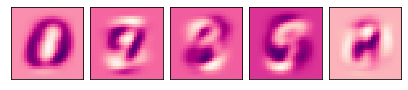

In [93]:
fig, axes = plt.subplots(1,5, figsize = (7, 3),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap = 'RdPu')

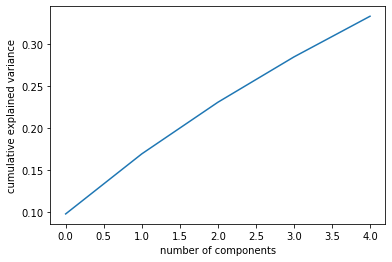

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

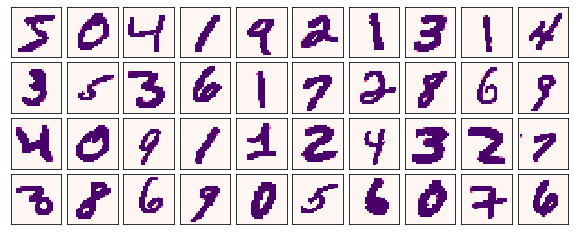

In [95]:
plot_digits(X)

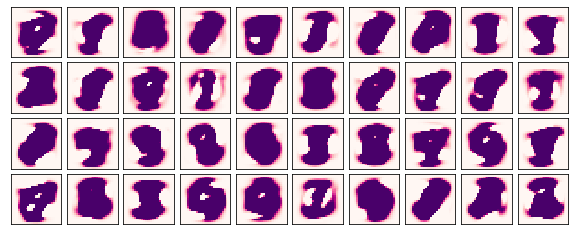

In [96]:
filtered = pca.inverse_transform(X_train_pca)
plot_digits(filtered)

## 3. LDA
## Aplique LDA nos dados originais 
## Exiba a projeção dos dados nos Discriminantes Lineares 
## Exiba a taxa de variância acumulada

In [145]:
lda = LDA(n_components = 5)

In [146]:
X_train_lda = lda.fit_transform(X_train, y_train)

In [147]:
X_test_lda = lda.transform(X_test)

In [148]:
y_pred = lda.predict(X_test)

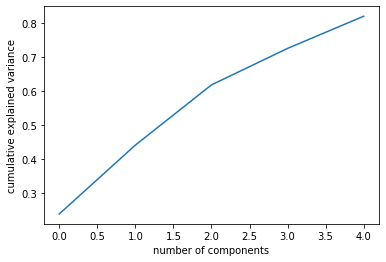

In [102]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## 4. Classificador
## Aplique um classificador de sua escolha nas features obtidas por LDA e PCA
## Compare os dois métodos e resultados

In [110]:
classifier_pca = RandomForestClassifier(max_depth = 5, random_state = 0)

classifier_pca.fit(X_train_pca, y_train)
y_pred = classifier_pca.predict(X_test_pca)

Accuracy 0.6365


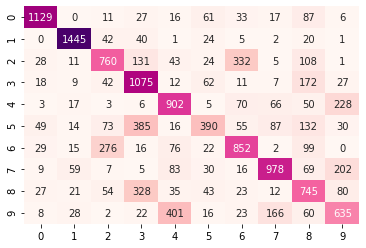

In [111]:
cm_pca = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_pca, cbar=False, annot=True, cmap="RdPu", fmt="d")

print('Accuracy', accuracy_score(y_test, y_pred))

In [112]:
classifier_lda = RandomForestClassifier(max_depth = 5, random_state = 0)

classifier_lda.fit(X_train_lda, y_train)
y_pred = classifier_lda.predict(X_test_lda)

Accuracy 0.7925


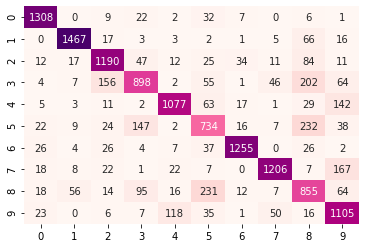

In [113]:
cm_lda = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lda, cbar=False, annot=True, cmap="RdPu", fmt="d")

print('Accuracy', accuracy_score(y_test, y_pred))